In [1]:
%cd C:\Users\yukir\Documents\GitHub\sign_detection\py

C:\Users\yukir\Documents\GitHub\sign_detection\py


In [2]:
from machine_learning import *
from basic_preprocessing import *

In [3]:
%cd C:\Users\yukir\Documents\Monicas_workspace\study

C:\Users\yukir\Documents\Monicas_workspace\study


### Data_load 

In [4]:
data_path = 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Sign detection\\machine_learning\\Dataset\\multi_to SGD\\'

In [5]:
get_file_list(data_path)

['C:\\Users\\yukir\\Documents\\Monicas_workspace\\Sign detection\\machine_learning\\Dataset\\multi_to SGD\\fragile',
 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Sign detection\\machine_learning\\Dataset\\multi_to SGD\\handle',
 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Sign detection\\machine_learning\\Dataset\\multi_to SGD\\up',
 'C:\\Users\\yukir\\Documents\\Monicas_workspace\\Sign detection\\machine_learning\\Dataset\\multi_to SGD\\wet']

In [6]:
categories = ['fragile', 'handle', 'up', 'wet']

In [7]:
data = data_for_ml(categories, data_path, 200)

C:\Users\yukir\Documents\Monicas_workspace\Sign detection\machine_learning\Dataset\multi_to SGD\fragile
C:\Users\yukir\Documents\Monicas_workspace\Sign detection\machine_learning\Dataset\multi_to SGD\handle
C:\Users\yukir\Documents\Monicas_workspace\Sign detection\machine_learning\Dataset\multi_to SGD\up
C:\Users\yukir\Documents\Monicas_workspace\Sign detection\machine_learning\Dataset\multi_to SGD\wet
data수:  688


In [8]:
features, labels = feature_label_maker(data)

features:  688
features ex:  [161 161 161 ... 169 169 169]
feature shape:  (40000,)
-----------------------------
labels:  688
labels ex:  0
labels shape:  (40000,)


In [9]:
for i in categories:
    img_path = data_path+i+'\\'
    print(i, count_img(img_path))

이미지 수 301
fragile None
이미지 수 103
handle None
이미지 수 171
up None
이미지 수 113
wet None


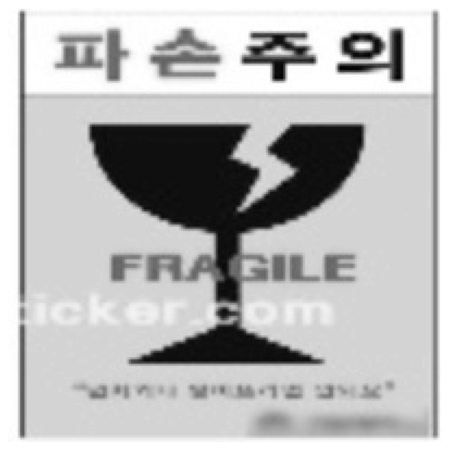

fragile


In [10]:
for_test = features[4]
for_test_img = for_test.reshape(200,200)
show(for_test_img)
print(categories[labels[0]])

### train_test_split

In [11]:
Counter(labels)

Counter({0: 301, 1: 103, 2: 171, 3: 113})

In [12]:
y = (labels==0).astype('int')
Counter(y)

Counter({1: 301, 0: 387})

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size = 0.2, random_state=42)

In [14]:
from collections import Counter

print(Counter(y_train))
print(Counter(y_test))

Counter({0: 318, 1: 232})
Counter({1: 69, 0: 69})


### Model train

In [15]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))
    return confusion

In [16]:
rf_clf = sklearn.ensemble.RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
confusion = get_clf_eval(y_test, pred)

confusion

오차 행렬
[[61  8]
 [30 39]]
정확도: 0.7246, 정밀도: 0.8298, 재현율: 0.5652, F1:0.6724


array([[61,  8],
       [30, 39]], dtype=int64)

### Precision/Recall Trade-off

In [17]:
pred_proba = rf_clf.predict_proba(X_test)
pred  = rf_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])

pred_proba()결과 Shape : (138, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.61 0.39]
 [0.76 0.24]
 [0.43 0.57]]
두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.61 0.39 0.  ]
 [0.76 0.24 0.  ]
 [0.43 0.57 1.  ]]


In [18]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = rf_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[51 18]
 [20 49]]
정확도: 0.7246, 정밀도: 0.7313, 재현율: 0.7101,    F1: 0.7206, AUC:0.7246
임곗값: 0.45
오차 행렬
[[58 11]
 [28 41]]
정확도: 0.7174, 정밀도: 0.7885, 재현율: 0.5942,    F1: 0.6777, AUC:0.7174
임곗값: 0.5
오차 행렬
[[61  8]
 [30 39]]
정확도: 0.7246, 정밀도: 0.8298, 재현율: 0.5652,    F1: 0.6724, AUC:0.7246
임곗값: 0.55
오차 행렬
[[64  5]
 [39 30]]
정확도: 0.6812, 정밀도: 0.8571, 재현율: 0.4348,    F1: 0.5769, AUC:0.6812
임곗값: 0.6
오차 행렬
[[67  2]
 [47 22]]
정확도: 0.6449, 정밀도: 0.9167, 재현율: 0.3188,    F1: 0.4731, AUC:0.6449


In [22]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = rf_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[51 18]
 [20 49]]
정확도: 0.7246, 정밀도: 0.7313, 재현율: 0.7101,    F1: 0.7206, AUC:0.7246
임곗값: 0.45
오차 행렬
[[58 11]
 [28 41]]
정확도: 0.7174, 정밀도: 0.7885, 재현율: 0.5942,    F1: 0.6777, AUC:0.7174
임곗값: 0.5
오차 행렬
[[61  8]
 [30 39]]
정확도: 0.7246, 정밀도: 0.8298, 재현율: 0.5652,    F1: 0.6724, AUC:0.7246
임곗값: 0.55
오차 행렬
[[64  5]
 [39 30]]
정확도: 0.6812, 정밀도: 0.8571, 재현율: 0.4348,    F1: 0.5769, AUC:0.6812
임곗값: 0.6
오차 행렬
[[67  2]
 [47 22]]
정확도: 0.6449, 정밀도: 0.9167, 재현율: 0.3188,    F1: 0.4731, AUC:0.6449


In [30]:
def get_clf_eval(y_test , pred):
    confusion=[]
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
#     print('오차 행렬')
#     print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))
    return confusion

In [33]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

정확도: 0.7246, 정밀도: 0.8298, 재현율: 0.5652, F1:0.6724


array([[61,  8],
       [30, 39]], dtype=int64)

In [24]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.4

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

confusions = get_clf_eval(y_test, custom_predict)
confusions

오차 행렬
[[51 18]
 [20 49]]
정확도: 0.7246, 정밀도: 0.7313, 재현율: 0.7101,    F1: 0.7206, AUC:0.7246


In [31]:
thresholds = [ 1.89, 0.85, 0.75, 0.62,  0.60, 0.59, 0.55, 0.54, 0.51,0.50, 0.46, 0.45, 
              0.43, 0.4, 0.39, 0.36, 0.32, 0.29, 0.24, 0.18, 0.13]


for i in thresholds:
    pred_proba_1 = pred_proba[:,1].reshape(-1,1)

    binarizer = Binarizer(threshold=i).fit(pred_proba_1) 
    custom_predict = binarizer.transform(pred_proba_1)
    confusions_array = []
    confusions = get_clf_eval(y_test, custom_predict)
print(confusions)

정확도: 0.5000, 정밀도: 0.0000, 재현율: 0.0000, F1:0.0000
정확도: 0.5145, 정밀도: 1.0000, 재현율: 0.0290, F1:0.0563
정확도: 0.5652, 정밀도: 1.0000, 재현율: 0.1304, F1:0.2308
정확도: 0.6377, 정밀도: 0.9524, 재현율: 0.2899, F1:0.4444
정확도: 0.6449, 정밀도: 0.9167, 재현율: 0.3188, F1:0.4731
정확도: 0.6522, 정밀도: 0.9200, 재현율: 0.3333, F1:0.4894
정확도: 0.6812, 정밀도: 0.8571, 재현율: 0.4348, F1:0.5769
정확도: 0.6957, 정밀도: 0.8462, 재현율: 0.4783, F1:0.6111
정확도: 0.7246, 정밀도: 0.8605, 재현율: 0.5362, F1:0.6607
정확도: 0.7246, 정밀도: 0.8298, 재현율: 0.5652, F1:0.6724
정확도: 0.7246, 정밀도: 0.8039, 재현율: 0.5942, F1:0.6833
정확도: 0.7174, 정밀도: 0.7885, 재현율: 0.5942, F1:0.6777
정확도: 0.7174, 정밀도: 0.7500, 재현율: 0.6522, F1:0.6977
정확도: 0.7246, 정밀도: 0.7313, 재현율: 0.7101, F1:0.7206
정확도: 0.7101, 정밀도: 0.7042, 재현율: 0.7246, F1:0.7143
정확도: 0.7174, 정밀도: 0.6875, 재현율: 0.7971, F1:0.7383
정확도: 0.6667, 정밀도: 0.6237, 재현율: 0.8406, F1:0.7160
정확도: 0.6449, 정밀도: 0.5943, 재현율: 0.9130, F1:0.7200
정확도: 0.6014, 정밀도: 0.5593, 재현율: 0.9565, F1:0.7059
정확도: 0.5580, 정밀도: 0.5312, 재현율: 0.9855, F1:0.6904
정확도: 0.5145, 정밀도: 0.

In [46]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))
    # return confusion

61

In [41]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤  
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

오차 행렬
[[51 18]
 [20 49]]
정확도: 0.7246, 정밀도: 0.7313, 재현율: 0.7101, F1:0.7206


array([[51, 18],
       [20, 49]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

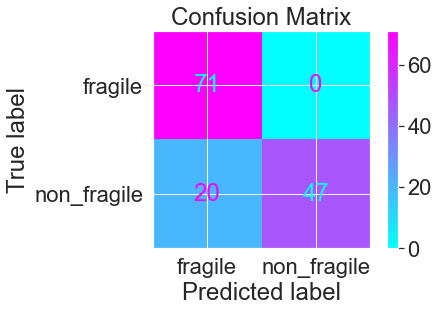

In [116]:
label=['fragile', 'non_fragile'] # 라벨 설정
sns.set(font_scale=2)
plot = plot_confusion_matrix(rf_clf, # 분류 모델
                             X_test, custom_predict, # 예측 데이터와 예측값의 정답(y_true)
                             display_labels=label, # 표에 표시할 labels
                             cmap = cm.get_cmap("cool"), # 컬러맵(plt.cm.Reds, plt.cm.rainbow 등이 있음)
                             normalize=None) 
plot.ax_.set_title('Confusion Matrix')

In [91]:
def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)


임곗값: 0.13
오차 행렬
[[ 3 66]
 [ 1 68]]
정확도: 0.5145, 정밀도: 0.5075, 재현율: 0.9855, F1:0.6700


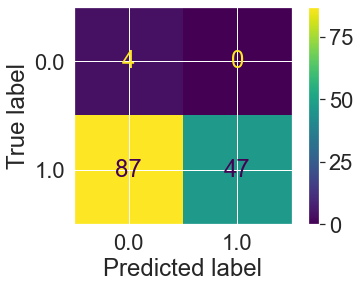

In [139]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
custom_thresholds = [0.13]
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_thresholds).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds)
plot_confusion_matrix(rf_clf, X_test, custom_predict)

In [27]:
def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    confusion_array = []
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:', custom_threshold)
        confusion = get_clf_eval(y_test , custom_predict)
        confusion_array.append(confusion)
    return confusion_array

In [28]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [ 1.89, 0.85, 0.75, 0.62,  0.60, 0.59, 0.55, 0.54, 0.51,0.50, 0.46, 0.45, 
              0.43, 0.4, 0.39, 0.36, 0.32, 0.29, 0.24, 0.18, 0.13]

confusions = get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds)
# confusion_array.append(confusions)

임곗값: 1.89
오차 행렬
[[69  0]
 [69  0]]
정확도: 0.5000, 정밀도: 0.0000, 재현율: 0.0000,    F1: 0.0000, AUC:0.5000
임곗값: 0.85
오차 행렬
[[69  0]
 [67  2]]
정확도: 0.5145, 정밀도: 1.0000, 재현율: 0.0290,    F1: 0.0563, AUC:0.5145
임곗값: 0.75
오차 행렬
[[69  0]
 [60  9]]
정확도: 0.5652, 정밀도: 1.0000, 재현율: 0.1304,    F1: 0.2308, AUC:0.5652
임곗값: 0.62
오차 행렬
[[68  1]
 [49 20]]
정확도: 0.6377, 정밀도: 0.9524, 재현율: 0.2899,    F1: 0.4444, AUC:0.6377
임곗값: 0.6
오차 행렬
[[67  2]
 [47 22]]
정확도: 0.6449, 정밀도: 0.9167, 재현율: 0.3188,    F1: 0.4731, AUC:0.6449
임곗값: 0.59
오차 행렬
[[67  2]
 [46 23]]
정확도: 0.6522, 정밀도: 0.9200, 재현율: 0.3333,    F1: 0.4894, AUC:0.6522
임곗값: 0.55
오차 행렬
[[64  5]
 [39 30]]
정확도: 0.6812, 정밀도: 0.8571, 재현율: 0.4348,    F1: 0.5769, AUC:0.6812
임곗값: 0.54
오차 행렬
[[63  6]
 [36 33]]
정확도: 0.6957, 정밀도: 0.8462, 재현율: 0.4783,    F1: 0.6111, AUC:0.6957
임곗값: 0.51
오차 행렬
[[63  6]
 [32 37]]
정확도: 0.7246, 정밀도: 0.8605, 재현율: 0.5362,    F1: 0.6607, AUC:0.7246
임곗값: 0.5
오차 행렬
[[61  8]
 [30 39]]
정확도: 0.7246, 정밀도: 0.8298, 재현율: 0.5652,    F1: 0.6724, AUC:0.7246
임곗

In [28]:
tn =[]
fp =[]
fn=[]
tp=[]
for num,i in enumerate (f):
    tn.append(i[0][0])
    fp.append(i[0][1])
    fn.append(i[1][0])
    tp.append(i[1][1])

In [ ]:
import pandas as pd
df_thresholds = pd.DataFrame({'trehsholds':thresholds, 'TN':tn, 'FP':fp, "FN":fn, "TP":tp})
df_thresholds.head()

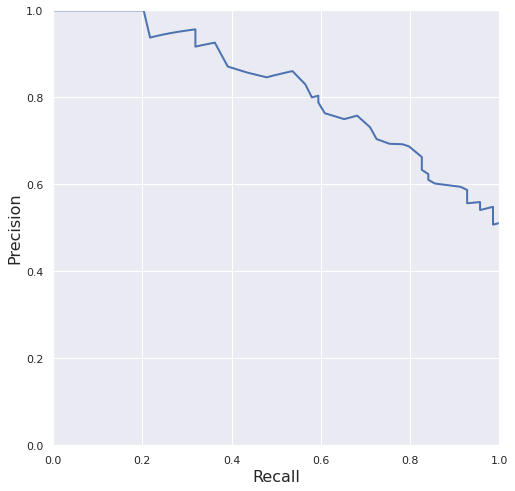

In [63]:
plt.figure(figsize=(8,8))
plot_precision_vs_recall(precisions, recalls)

In [64]:
df_thresholds.to_csv('RF_threshold.csv')

In [81]:
df_thresholds = df_thresholds.rename(columns={'trehsholds':'tresholds'})

In [47]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [ 1.89, 0.85, 0.75, 0.62,  0.60, 0.59, 0.55, 0.54, 0.51,0.50, 0.46, 0.45, 
              0.43, 0.4, 0.39, 0.36, 0.32, 0.29, 0.24, 0.18, 0.13]
get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 1.89
오차 행렬
[[69  0]
 [69  0]]
정확도: 0.5000, 정밀도: 0.0000, 재현율: 0.0000, F1:0.0000
임곗값: 0.85
오차 행렬
[[69  0]
 [67  2]]
정확도: 0.5145, 정밀도: 1.0000, 재현율: 0.0290, F1:0.0563
임곗값: 0.75
오차 행렬
[[69  0]
 [60  9]]
정확도: 0.5652, 정밀도: 1.0000, 재현율: 0.1304, F1:0.2308
임곗값: 0.62
오차 행렬
[[68  1]
 [49 20]]
정확도: 0.6377, 정밀도: 0.9524, 재현율: 0.2899, F1:0.4444
임곗값: 0.6
오차 행렬
[[67  2]
 [47 22]]
정확도: 0.6449, 정밀도: 0.9167, 재현율: 0.3188, F1:0.4731
임곗값: 0.59
오차 행렬
[[67  2]
 [46 23]]
정확도: 0.6522, 정밀도: 0.9200, 재현율: 0.3333, F1:0.4894
임곗값: 0.55
오차 행렬
[[64  5]
 [39 30]]
정확도: 0.6812, 정밀도: 0.8571, 재현율: 0.4348, F1:0.5769
임곗값: 0.54
오차 행렬
[[63  6]
 [36 33]]
정확도: 0.6957, 정밀도: 0.8462, 재현율: 0.4783, F1:0.6111
임곗값: 0.51
오차 행렬
[[63  6]
 [32 37]]
정확도: 0.7246, 정밀도: 0.8605, 재현율: 0.5362, F1:0.6607
임곗값: 0.5
오차 행렬
[[61  8]
 [30 39]]
정확도: 0.7246, 정밀도: 0.8298, 재현율: 0.5652, F1:0.6724
임곗값: 0.46
오차 행렬
[[59 10]
 [28 41]]
정확도: 0.7246, 정밀도: 0.8039, 재현율: 0.5942, F1:0.6833
임곗값: 0.45
오차 행렬
[[58 11]
 [28 41]]
정확도: 0.7174, 정밀도: 0.7885, 재현율: 0.5942, F1:0

### CURVE

In [59]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = rf_clf.predict_proba(X_test)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)

#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

반환된 분류 결정 임곗값 배열의 Shape: (57,)
샘플 추출을 위한 임계값 배열의 index 10개: [ 0 15 30 45]
샘플용 10개의 임곗값:  [0.13 0.31 0.49 0.65]
샘플 임계값별 정밀도:  [0.511 0.602 0.804 0.947]
샘플 임계값별 재현율:  [1.    0.855 0.594 0.261]


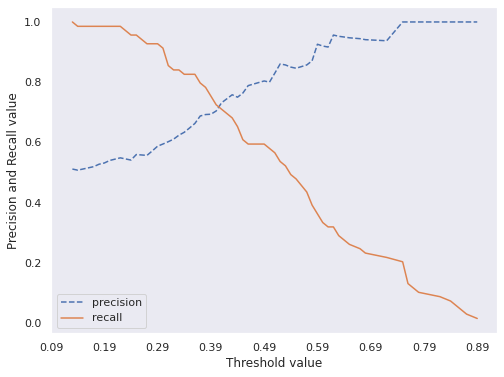

In [60]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, rf_clf.predict_proba(X_test)[:, 1] )

### F1 score

In [55]:
from sklearn.metrics import f1_score 
f1 = f1_score(y_test_fragile , pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.6724


In [56]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = rf_clf.predict_proba(X_test)
get_eval_by_threshold(y_test_fragile, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[51 18]
 [20 49]]
정확도: 0.7246, 정밀도: 0.7313, 재현율: 0.7101, F1:0.7206
임곗값: 0.45
오차 행렬
[[58 11]
 [28 41]]
정확도: 0.7174, 정밀도: 0.7885, 재현율: 0.5942, F1:0.6777
임곗값: 0.5
오차 행렬
[[61  8]
 [30 39]]
정확도: 0.7246, 정밀도: 0.8298, 재현율: 0.5652, F1:0.6724
임곗값: 0.55
오차 행렬
[[64  5]
 [39 30]]
정확도: 0.6812, 정밀도: 0.8571, 재현율: 0.4348, F1:0.5769
임곗값: 0.6
오차 행렬
[[67  2]
 [47 22]]
정확도: 0.6449, 정밀도: 0.9167, 재현율: 0.3188, F1:0.4731


In [61]:
fprs.shape

(47,)

In [62]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = rf_clf.predict_proba(X_test)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 3)
print('샘플 추출을 위한 임곗값 배열의 index 16개:', thr_index)
print('샘플용 16개의 임곗값: ', np.round(thresholds[thr_index], 3))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index 16개: [ 0  3  6  9 12 15 18 21 24 27 30 33 36 39 42 45]
샘플용 16개의 임곗값:  [1.89 0.85 0.75 0.62 0.59 0.54 0.51 0.46 0.43 0.39 0.36 0.32 0.29 0.24
 0.18 0.13]
샘플 임곗값별 FPR:  [0.    0.    0.    0.014 0.029 0.087 0.116 0.159 0.217 0.333 0.42  0.536
 0.652 0.812 0.884 0.957]
샘플 임곗값별 TPR:  [0.    0.058 0.203 0.319 0.362 0.493 0.565 0.594 0.681 0.754 0.826 0.841
 0.928 0.957 0.986 1.   ]


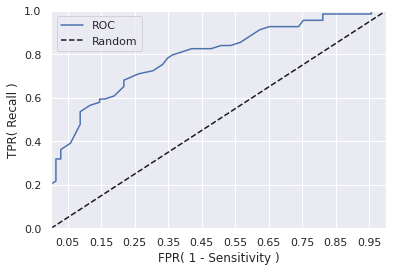

In [61]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test_fragile, rf_clf.predict_proba(X_test)[:, 1] )

In [62]:

from sklearn.metrics import roc_auc_score

pred = rf_clf.predict(X_test)
roc_score = roc_auc_score(y_test_fragile, pred)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.7246


In [63]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [64]:
get_clf_eval(y_test_fragile, pred)

오차 행렬
[[61  8]
 [30 39]]
정확도: 0.7246, 정밀도: 0.8298, 재현율: 0.5652,    F1: 0.6724, AUC:0.7246
